In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
master = pd.read_csv('insurance.csv')

In [3]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
master.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [5]:
working = master.copy()

In [16]:
working.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

<AxesSubplot:xlabel='sex', ylabel='count'>

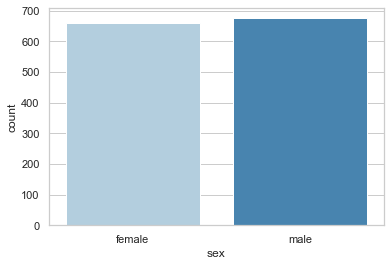

In [40]:
sns.countplot(working['sex'],palette='Blues')

<AxesSubplot:xlabel='region', ylabel='count'>

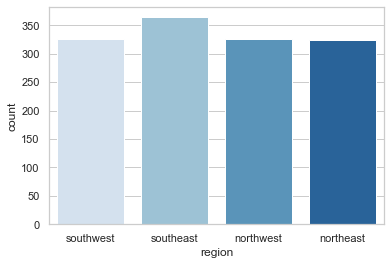

In [39]:
sns.countplot(working['region'],palette='Blues')

<AxesSubplot:xlabel='smoker', ylabel='count'>

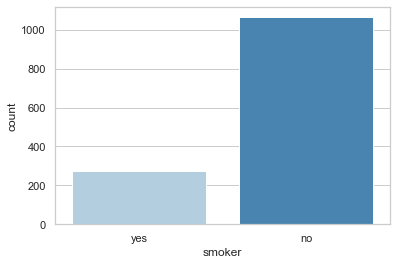

In [38]:
sns.countplot(working['smoker'],palette='Blues')

<AxesSubplot:xlabel='children', ylabel='count'>

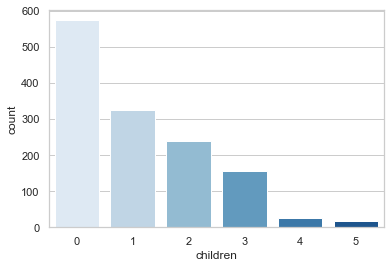

In [37]:
sns.countplot(working['children'],palette='Blues')

<AxesSubplot:xlabel='age', ylabel='charges'>

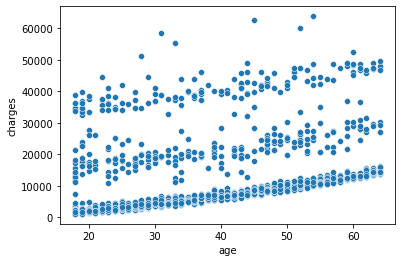

In [8]:
sns.scatterplot(x=working['age'],y=working['charges'])

<AxesSubplot:xlabel='bmi', ylabel='charges'>

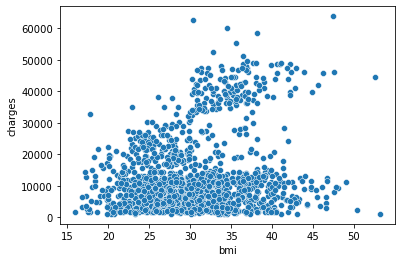

In [12]:
sns.scatterplot(x=working['bmi'],y=working['charges'])

<AxesSubplot:xlabel='charges', ylabel='Density'>

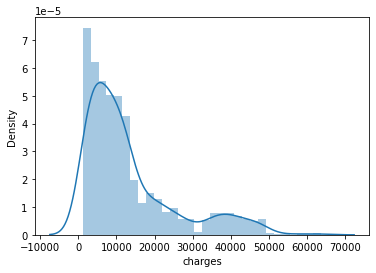

In [13]:
sns.distplot(working['charges'])

Text(0.5, 1.0, 'Distribution of prices')

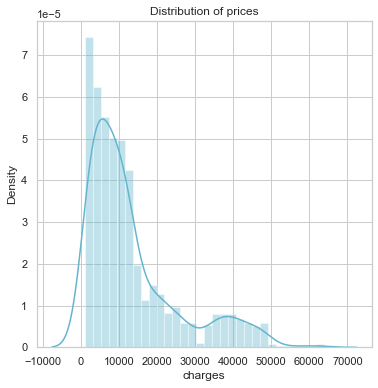

In [19]:
sns.set(style='whitegrid')
f,ax = plt.subplots(1,1, figsize =(6,6))
ax = sns.distplot(working['charges'],color='c')
plt.title('Distribution of prices')

Since, the target variable is right skewed we apply natural Logarithm to it

Text(0.5, 1.0, 'Distribution of prices')

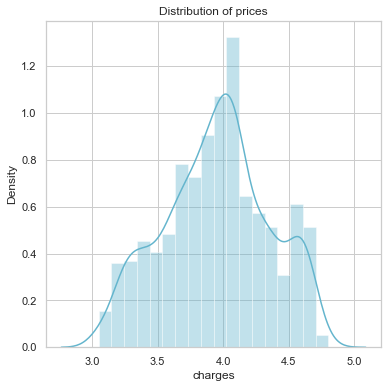

In [22]:
sns.set(style='whitegrid')
f,ax = plt.subplots(1,1, figsize =(6,6))
ax = sns.distplot(np.log10(working['charges']),color='c')
plt.title('Distribution of prices')

<AxesSubplot:xlabel='region', ylabel='charges'>

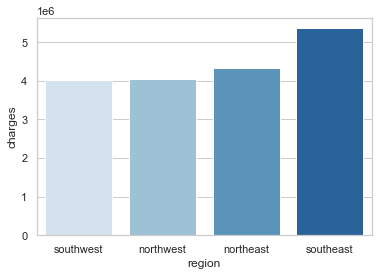

In [36]:
charges = working.groupby(working['region']).sum().sort_values(by=['charges'])
sns.barplot(x=charges.index,y='charges',data = charges, palette='Blues')

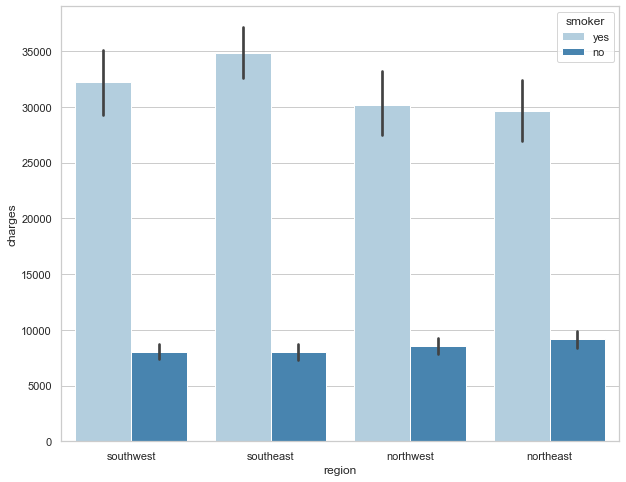

In [60]:
f,ax = plt.subplots(1, 1, figsize=(10, 8))
ax = sns.barplot(x='region',y = 'charges',data = working,hue = 'smoker',palette='Blues')

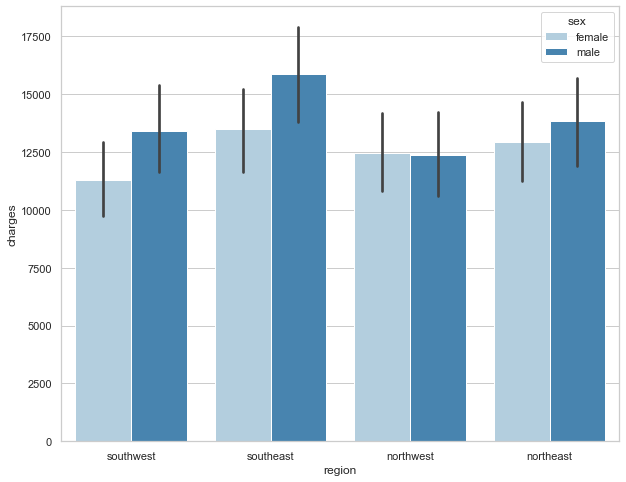

In [55]:
f,ax =plt.subplots(1, 1, figsize=(10, 8))
ax = sns.barplot(x='region',y = 'charges',data = working,hue = 'sex',palette='Blues')

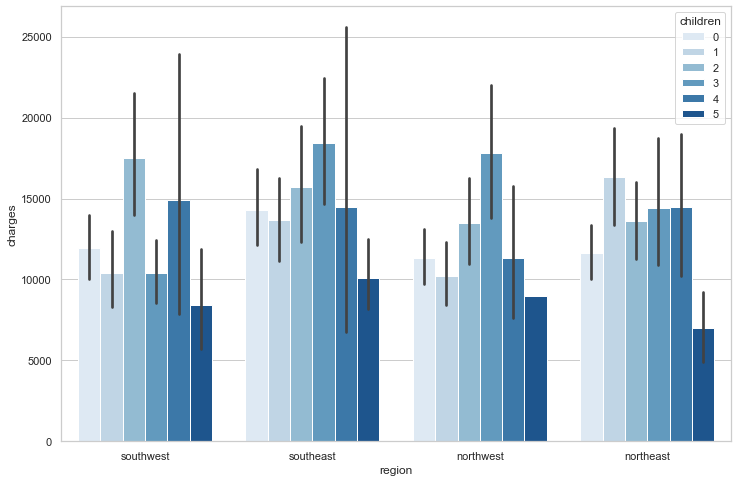

In [46]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region',y = 'charges',data = working,hue = 'children',palette='Blues')

In [78]:
ax1[0]

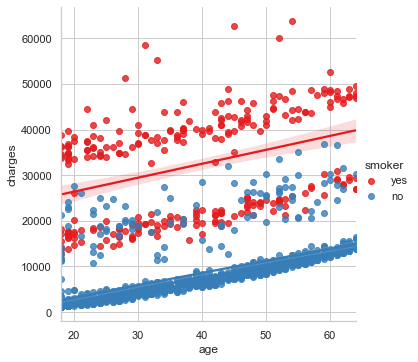

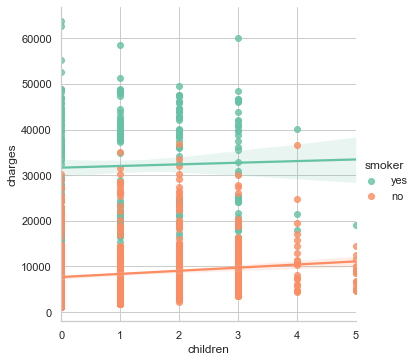

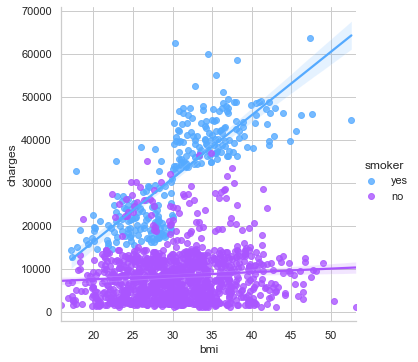

In [83]:
#f,ax1 = plt.subplots(1,3,figsize =(8,8))
#$#$f.tight_layout(pad=3)
sns.lmplot(x = 'age',y = 'charges', data = working,hue='smoker',palette='Set1')
sns.lmplot(x = 'children',y = 'charges', data = working,hue='smoker',palette='Set2')
sns.lmplot(x = 'bmi',y = 'charges', data = working,hue='smoker',palette='cool')
#plt.show()

In [86]:
working[['sex', 'smoker', 'region']] = working[['sex', 'smoker', 'region']].astype('category')

In [88]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(working.sex.drop_duplicates())
working.sex = label.transform(working.sex)
label.fit(working.smoker.drop_duplicates())
working.smoker = label.transform(working.smoker)
label.fit(working.region.drop_duplicates())
working.region = label.transform(working.region)

<AxesSubplot:>

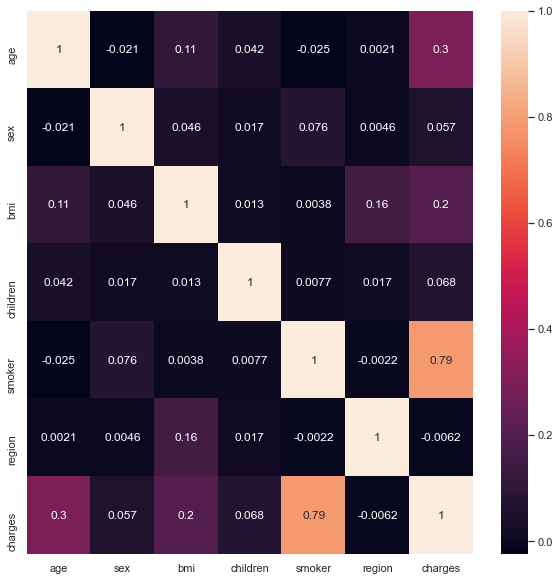

In [91]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(working.corr(), annot=True)

In [93]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = working.drop(['charges'], axis = 1)
y = working['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11661.983908824392
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.7998747145449959


In [94]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-11643.440927495818
[ 2.53893751e+02 -2.15112284e+01  3.28339566e+02  4.44238477e+02
  2.35009674e+04 -2.89027871e+02]
0.799698963206314


In [95]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-11661.838929039537
[ 2.53991436e+02 -2.34569821e+01  3.28389438e+02  4.43587436e+02
  2.35676136e+04 -2.88340296e+02]
0.7998690236224705


In [96]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = working.drop(['charges'], axis=1)
y = working.charges
Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,x_train_pred, y_train),
       metrics.r2_score(y_test,x_test_pred, y_test)))

MSE train data: 3635087.011, MSE test data: 19766481.085
R2 train data: 0.971, R2 test data: 0.877


Feature importance ranking


1.smoker(0.601678)
2.bmi(0.218724)
3.age(0.136971)
4.children(0.021047)
5.region(0.015208)
6.sex(0.006371)


<BarContainer object of 6 artists>

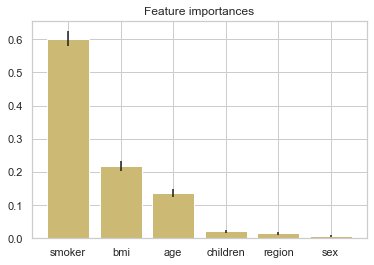

In [97]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

In [101]:
from sklearn.preprocessing import PolynomialFeatures
x = working.drop(['charges', 'sex', 'region'], axis = 1)
y = working.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

SyntaxError: invalid syntax (<ipython-input-101-9001646e2b65>, line 4)

In [100]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2824.495045477617
Mean Squared Error: 18895160.09878023
Root Mean Squared Error: 4346.856346692427


In [102]:
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

Actual     Predicted
578    9724.53000  12101.156323
610    8547.69130  10440.782266
569   45702.02235  48541.022951
1034  12950.07120  14140.067522
198    9644.25250   8636.235727
...           ...           ...
1084  15019.76005  16712.196281
726    6664.68595   8654.565461
1132  20709.02034  12372.050609
725   40932.42950  41465.617268
963    9500.57305  10941.780705

[268 rows x 2 columns]